### Реализация линейной регресси без жесткого ООП, но с поддержкой порядочного наследования

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import mod_linear_regression as lr_module
from importlib import  reload

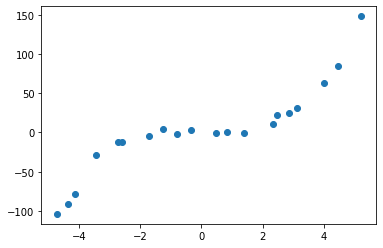

In [24]:
def create_third_polynomial_features(X):
    return np.hstack([np.ones_like(X),
               X,
               X**2,
               X**3])

np.random.seed(10)
X = np.linspace(-5, 5, 20)[:, np.newaxis] + np.random.normal(0, 0.5, (20, 1))
Y = X ** 3 + np.random.normal(0, 5, (20, 1))
plt.scatter(X, Y)
polynomial_X = create_third_polynomial_features(X)
init_theta = np.random.rand(4)


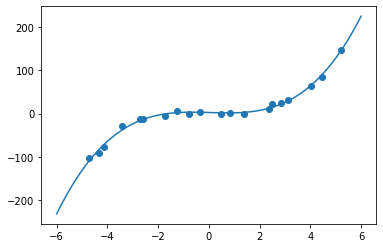

In [28]:
def plot_optimized_linear_regression():
    lr = lr_module.LinearRegressionCore()
    optimization_result = minimize(lr.get_error_and_grad,
                                   init_theta,
                                   (polynomial_X, Y),
                                   method='TNC',
                                   jac=True,
                                   options={'maxiter':100})
    optimized_theta = optimization_result.x
    line_X = np.linspace(-6, 6, 100)[:, np.newaxis]
    line_X_polynomial = create_third_polynomial_features(line_X)
    line_Y = lr.predict(line_X_polynomial, optimized_theta)
    plt.plot(line_X, line_Y)

plot_optimized_linear_regression()
plt.scatter(X, Y)